## 1.1 - Movielens full - EDA

---



 a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,
utan försök undersöka fler aspekter av datan.
---

Jag startar med att titta över datan så att jag kan visualisera det bättre med planen att skriva ut filmer ihopsatta med deras respektive genre.

In [2]:
import pandas as pd

movies_path = "../../data/ml-latest/movies.csv"

movies_df = pd.read_csv(movies_path)

print(movies_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


Med denna utskrift så kan jag se att den innehåller tre stycken olika kolumner "movieId", "title" och "genres", vi kan dock se att genre delas med ett | planen är då att ta ut den relevanta med att splitta från varje | som förekommer för att få fram god data. ChatGPT gav mig ett tips om att använda Counter för att räkna relevant data, hittade tyvärr inte dom relevanta kommandona för det så jag skriver det med hjälp av just GPT men i lärningssyfte att jag ska veta vad jag gör. 

In [3]:
from collections import Counter # ChatGPT gav mig ett gott tips att använda Counter här
import pandas as pd

movies_path = "../../data/ml-latest/movies.csv"
movies_df = pd.read_csv(movies_path)

#Splitta genrerna från | och skapa en lista med alla genre
genre_list = "|".join(movies_df["genres"]).split("|") 

# Räkna varje del av genrerna
genre_counts = Counter(genre_list)

# Konverterar genre_counts till df för visualisering
genre_counts_df = pd.DataFrame(genre_counts.items(), columns = ["Genre", "Movies"])

# Sortera df efter antalet filmerna i descending order
genre_counts_df = genre_counts_df.sort_values(by="Movies", ascending = False).reset_index(drop=True) 

genre_counts_df

,Genre,Movies
0,Drama,33681
1,Comedy,22830
2,Thriller,11675
3,Romance,10172
4,Action,9563
5,Documentary,9283
6,Horror,8570
7,(no genres listed),7060
8,Crime,6917
9,Adventure,5349


med detta så kan vi då med lätthet göra en plot på detta, använder matplotlib för denna övning.

Jag inser att den inte går efter datavisualiserings designregler, men i detta fall är det mera för att se till att allting skrivs ut rätt och stämmer.

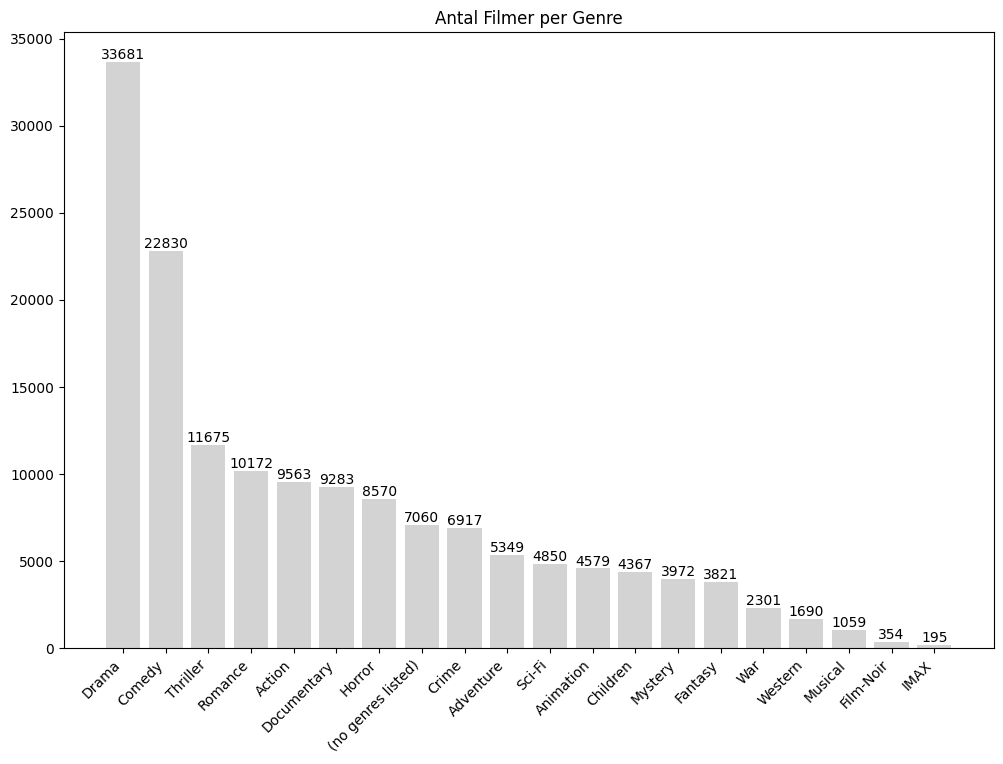

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.bar(genre_counts_df["Genre"], genre_counts_df["Movies"], color="lightgrey")

plt.title("Antal Filmer per Genre")

plt.xticks(rotation=45, ha="right")


#gör en uskrift av varje stapel för att dubbelkolla att siffrorna stämmer
for index, value in enumerate(genre_counts_df["Movies"]):
    plt.text(index, value, str(value), ha="center", va="bottom")

plt.show()


---

b) Vilka är de 10 filmerna med flest ratings?




In [26]:
import pandas as pd

ratings_path = "../../data/ml-latest/ratings.csv"

ratings_df = pd.read_csv(ratings_path)

ratings_df


,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765
